<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

## Изучение данных из файла

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('real_estate_data.csv', sep='\t')
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

Многие столбцы содержат пропущенные значения, что требует предварительной обработки данных. Особенно много пропусков в столбцах: ceiling_height, is_apartment, balcony, parks_nearest, ponds_nearest, days_exposition.
Столбцы airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000 имеют примерно одинаковое количество пропусков, что может указывать на общую причину отсутствия данных. Столбец first_day_exposition имеет строковый формат даты, который необходимо преобразовать в формат datetime для анализа временных рядов.

## Предобработка данных

Для начала преобразую тип данных столбца first_day_exposition

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition']

,first_day_exposition
0,2019-03-07
1,2018-12-04
2,2015-08-20
3,2015-07-24
4,2018-06-19
...,...
23694,2017-03-21
23695,2018-01-15
23696,2018-02-11
23697,2017-03-28


теперь изучим эти столбцы есть ли связь, в пропусках? airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000

In [ ]:
data[data['airports_nearest'].isnull()].head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30,2,NaN,5.0,30.00,5,NaN,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24,2,2.75,25.0,30.00,15,NaN,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
38,10,3150000.0,40.00,2018-03-29,1,2.75,18.0,16.30,9,NaN,...,11.60,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.0
47,17,3600000.0,56.10,2018-10-18,3,NaN,4.0,42.50,3,NaN,...,5.70,1.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0
60,3,2740000.0,35.00,2018-01-01,1,NaN,12.0,NaN,8,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
62,0,4800000.0,78.60,2017-09-17,3,2.80,9.0,48.80,5,NaN,...,11.90,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0


Да, как и предпологалось пропуски в этих столбцах взаимосвязанны, можно обратить внимание на местоположение, все находяться в поселках деревнях или небольших городах, я думаю эти данные пропущенны из за может быть не развитых карт в этих местах, чтобы точно рассчитать данное растояние, или пропуски допустим в удаленности от аэропорта связанны с очень далеким расположением от аэропорта. Так как в дальнейшем мы не особо будем задействовать эти данные(вроде бы вообще нет) то  предлагаю пока оставить эти пропуски нетронутыми

In [ ]:
data['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19])

In [ ]:
data.loc[data['rooms'] == 0].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.00,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.30,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0


In [ ]:
data.loc[data['rooms'] == 0, 'rooms'] = 1
data['rooms'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19])

Думаю где ноль количество комнат было равно нулю, было указанно ошибачно, думаю это приимущественно однокомнатные квартиры судя по их метражу, поэтому заменила квартиры с нулем комнат на одну, а квартиры с 16 комнатами тоже показались мне ошибочными, но я проверила и там достаточно большой метраж, так что думаю это не ошибка, а реально достаточно большая квартира

In [ ]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Потолки ниже 2.40 и выше 6.0 аномальныы, думаю были записанны по ошибке заменю на 2.40 и 6.0 соответственно

In [ ]:
data.loc[data['ceiling_height'] < 2.40, 'ceiling_height'] = 2.40
data.loc[data['ceiling_height'] > 6.0, 'ceiling_height'] = 6.0
data['ceiling_height'].sort_values().unique()

array([2.4 , 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53, 2.54,
       2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64, 2.65,
       2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75, 2.76,
       2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87,
       2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98,
       2.99, 3.  , 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09,
       3.1 , 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2 , 3.21,
       3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3 , 3.31, 3.32,
       3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4 , 3.42, 3.43, 3.44,
       3.45, 3.46, 3.47, 3.48, 3.49, 3.5 , 3.51, 3.52, 3.53, 3.54, 3.55,
       3.56, 3.57, 3.58, 3.59, 3.6 , 3.62, 3.63, 3.65, 3.66, 3.67, 3.68,
       3.69, 3.7 , 3.75, 3.76, 3.78, 3.8 , 3.82, 3.83, 3.84, 3.85, 3.86,
       3.87, 3.88, 3.9 , 3.93, 3.95, 3.98, 4.  , 4.06, 4.1 , 4.14, 4.15,
       4.19, 4.2 , 4.25, 4.3 , 4.37, 4.4 , 4.45, 4.

In [ ]:
data[data['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000.0,39.0,2017-12-16,1,NaN,9.0,20.0,6,NaN,...,11.0,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23690,3,5500000.0,52.0,2018-07-19,2,NaN,5.0,31.0,2,NaN,...,6.0,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23692,2,1350000.0,30.0,2017-07-07,1,NaN,5.0,17.5,4,NaN,...,6.0,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.0,2018-01-15,3,NaN,5.0,38.0,4,NaN,...,8.5,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Пропущенные значения думаю пропкщенны из за человеческого фактора заполню их медианными значениями

In [ ]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data[data['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [ ]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [ ]:
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02,2,2.65,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01,2,2.65,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06,3,2.65,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22,1,2.65,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24,2,2.80,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02,2,2.65,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20,3,2.65,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25,3,2.65,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Пропуски в столбце количество этажей в здании думаю допущенны так же из за человеческого фактора, поэтому заменю их на тот этаж на котором находиться квартира, может быть человек не указал сколько всего, так как там например всего один этаж или квартира и так находиться на самом верхнем этаже

In [ ]:
data['floors_total'] = data['floors_total'].fillna(data['floor'])
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Так же изменим тип столбца на инт, так как дробного этажа не может быть

In [ ]:
data['floors_total'] = data['floors_total'].astype(int)

In [ ]:
data[data['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.80,2018-02-19,1,2.65,9,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28,2,2.50,5,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.00,2018-11-18,1,2.65,22,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03,3,2.70,12,NaN,5,NaN,...,NaN,NaN,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.00,2018-01-12,4,2.55,10,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08,1,2.80,9,NaN,2,NaN,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.00,2017-12-08,1,2.65,9,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Думаю в столбце living_areа допушенны пропуски так как люди не доконца поняли различие между total_area и living_areа и не стали заполнять, поэтому прировняем их

In [ ]:
data['living_area'] = data['living_area'].fillna(data['total_area'])
data[data['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [ ]:
data['is_apartment'].isna().count()

np.int64(23699)

Тут очень много пропусков, и мое предположение что они допущенны, так как большенство людей у которых не апартаменты просто пропускали этот пункт и ничего не указывали, поэтому заполним пропуски False

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data[data['living_area'].isna()]

<ipython-input-20-822f4b574d5c>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_apartment'] = data['is_apartment'].fillna(False)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Данные в стобце kitchen_area думаю пропущенны людьми просто так, поэтому заполним их медианным значением

In [ ]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
data[data['kitchen_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Данные в стобце balcony думаю пропущенны людьми так как у кого нет балкона просто оставляли этот пункт и не заполняли, поэтому внесем вместо них число ноль

In [ ]:
data['balcony'] = data['balcony'].fillna(0)
data[data['balcony'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


И изменим тип данных на инт, так как число балконов целое

In [ ]:
data['balcony'] = data['balcony'].astype(int)

In [ ]:
data[data['days_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,71.6,22,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.00,2018-11-18,1,2.65,22,40.0,3,False,...,9.10,1,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02,2,2.65,9,30.3,7,False,...,7.00,0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.10,2019-01-31,2,2.60,24,29.7,9,False,...,8.30,2,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02,4,3.00,26,71.4,17,False,...,15.60,0,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.00,2019-01-24,1,2.50,5,17.3,5,False,...,5.60,1,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,9.10,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В столбце 'days_exposition' думаю пропуски допущенны так как эту квартиру например еще не купили, поэтому оставлю и не буду ничего делать с этими пропусками


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

На этом завершу предобработку данных

## Расчёты и добавление результатов в таблицу

In [ ]:
#Цена квадратного метра
data['price_per_square_meter'] = data['last_price'] / data['total_area']

In [ ]:
#День недели, месяц и год публикации объявления
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [ ]:
#Этаж квартиры (первый, последний, другой)
def categorize_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_category'] = data.apply(categorize_floor, axis=1)

In [ ]:
#Соотношение жилой и общей площади
data['living_to_total_ratio'] = data['living_area'] / data['total_area']

In [ ]:
#Отношение площади кухни к общей площади
data['kitchen_to_total_ratio'] = data['kitchen_area'] / data['total_area']

In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floor_category,living_to_total_ratio,kitchen_to_total_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,NaN,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2.0,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,159.0,9,False,...,3.0,234.0,424.0,408176.100629,4,7,2015,другой,1.000000,0.057233
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000


## Исследовательский анализ данных

<Axes: title={'center': 'total_area'}, ylabel='Frequency'>

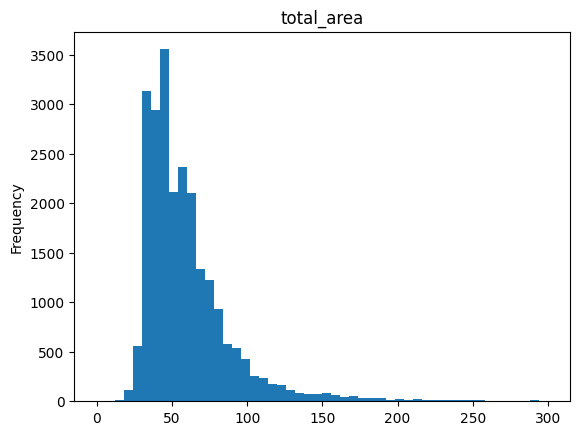

In [ ]:
data['total_area'].plot(kind='hist', bins=50, title='total_area', range=(0, 300))

Большинство объектов имеют общую площадь в диапазоне от 25 до 50 квадратных метров.

<Axes: title={'center': 'last_price'}, ylabel='Frequency'>

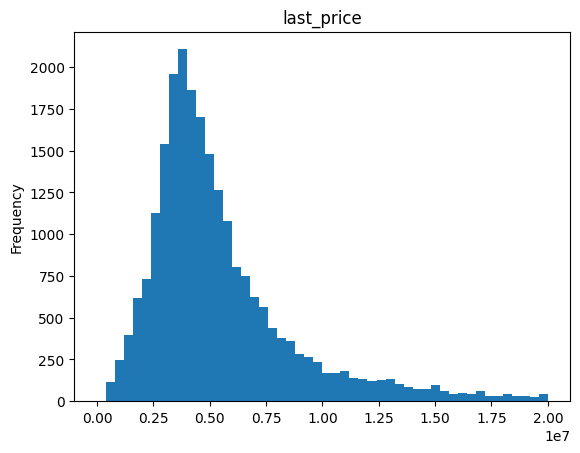

In [ ]:
data['last_price'].plot(kind='hist', bins=50, title='last_price', range=(0, 20000000))

Наблюдается резкий пик в области низких цен 0.03 – 0.55, что говорит о том, что большинство объектов относятся к бюджетному сегменту

<Axes: title={'center': 'rooms'}, ylabel='Frequency'>

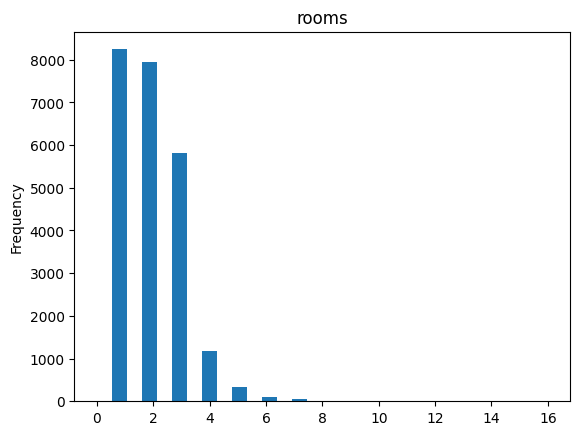

In [ ]:
data['rooms'].plot(kind='hist', bins=30, title='rooms', range=(0, 16))

В данных преобладают объекты с 1–3 комнатами, что характерно для стандартных квартир.

<Axes: title={'center': 'ceiling_height'}, ylabel='Frequency'>

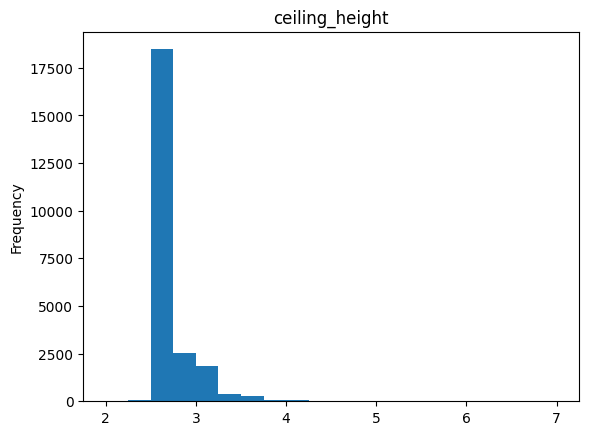

In [ ]:
data['ceiling_height'].plot(kind='hist', bins=20, title='ceiling_height', range=(2, 7))

 Большинство объектов имеют высоту потолков в диапазоне от 2.5 до 3.5 метров. Это стандартная высота для большинства жилых помещений.

<Axes: title={'center': 'days_exposition'}, ylabel='Frequency'>

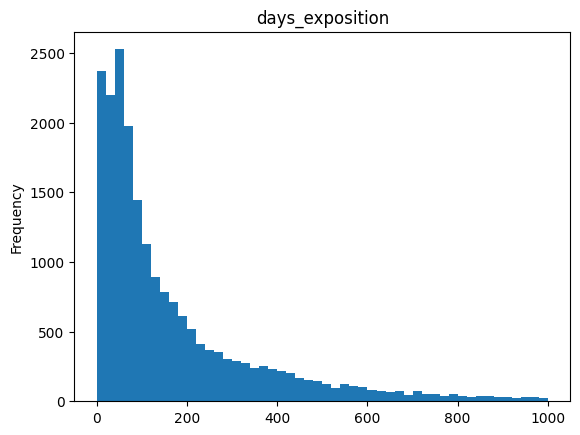

In [ ]:
data['days_exposition'].plot(kind='hist', bins=50, title='days_exposition', range=(0, 1000))

Основная часть объектов находит покупателя или снимается с продажи в течение первых 200 дней. Это может указывать на высокий спрос или хорошо подобранные цены.

In [ ]:
print(f'Среднее время продажи: {data["days_exposition"].mean()}')
print(f'Медианное время продажи: {data["days_exposition"].median()}')

Среднее время продажи: 180.88863436982163
Медианное время продажи: 95.0


In [ ]:
data["days_exposition"].sort_values().max()

1580.0

Среднее время продажи больше медианного, что говорит о наличии выбросов.
Я думаю быстрые продажи до 50 дней.
Долгие продажи более 200 дней.

Теперь уберу выбросные данные:

In [ ]:
data.shape

(23699, 29)

In [ ]:
data = data.query('total_area <= 200 and last_price <= 20000000 and rooms <= 6 and ceiling_height <= 4.5 and days_exposition <= 1000')
data.shape

(19688, 29)

Квартиры с площадью более 200 кв.м встречаются редко и могут быть аномальными.
Квартиры с ценой выше 20 миллионов также могут быть редкими и аномальными.
Квартиры с более чем 6 комнатами встречаются крайне редко и могут быть ошибками.
Высота потолков более 4.5 метров нетипична для большинства квартир.
Продажа квартиры, занимающая более 1000 дней, считается аномально долгой.

<Axes: title={'center': 'Зависимость цены от площади'}, xlabel='total_area', ylabel='last_price'>

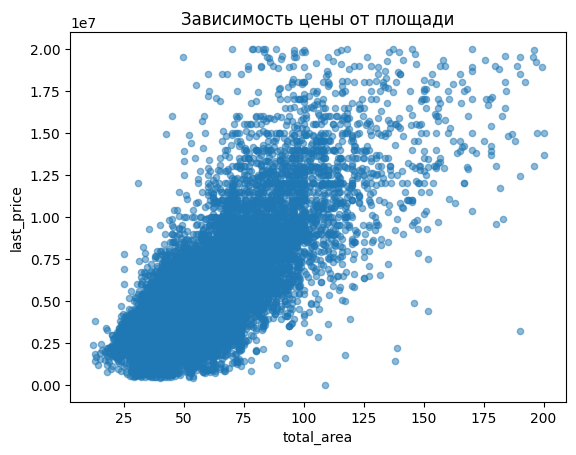

In [ ]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.5, title='Зависимость цены от площади')

В целом, с увеличением площади объекта его цена растет, но это не строго

<Axes: title={'center': 'Зависимость средней цены от числа комнат'}, xlabel='rooms', ylabel='last_price'>

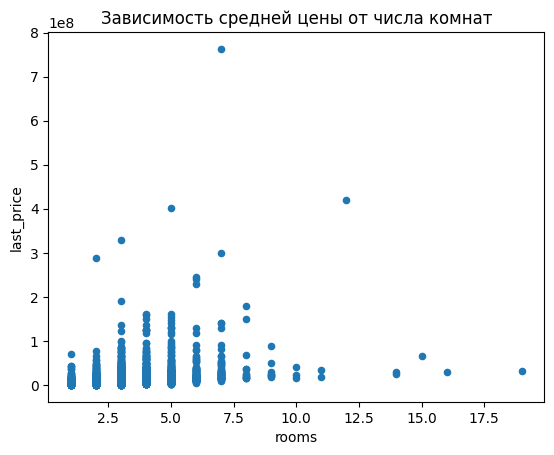

In [ ]:
data.plot(x='rooms', y='last_price', kind='scatter', title='Зависимость средней цены от числа комнат')

В целом, с увеличением количества комнат средняя цена объекта растет, но это не строго

<Axes: title={'center': 'Зависимость цены от удаленности от центра'}, xlabel='cityCenters_nearest', ylabel='last_price'>

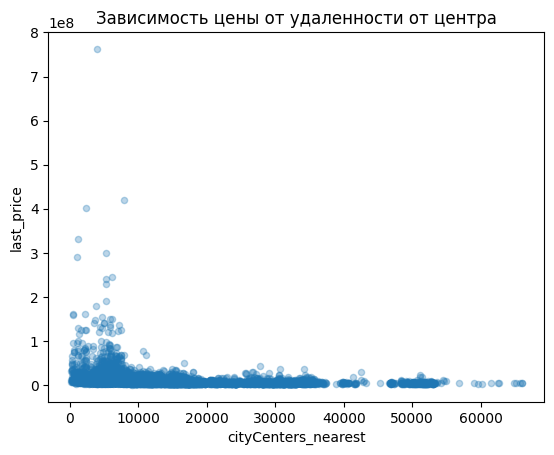

In [ ]:
data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', title='Зависимость цены от удаленности от центра', alpha=0.3)

С увеличением удаленности от центра города цена объекта снижается, но эта зависимость не является строго линейной.

<Axes: title={'center': 'Зависимость средней цены от этажа'}, xlabel='floor_category', ylabel='last_price'>

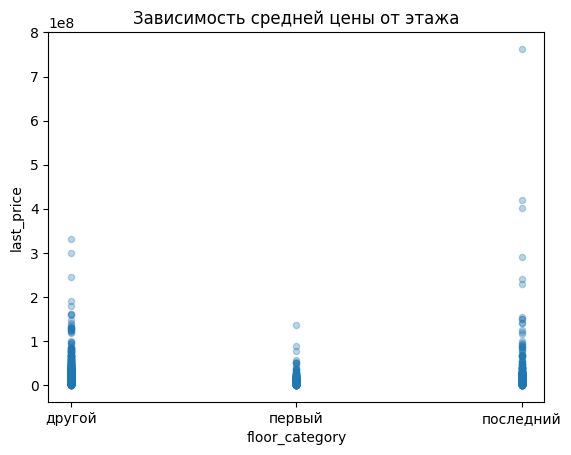

In [ ]:
data.plot(kind='scatter', x='floor_category', y='last_price', title='Зависимость средней цены от этажа', alpha=0.3)

можно заметить, что квартиры на первом этаже имеют меньшую стоимость по сравнению с квартирами на последнем и других этажах

<Axes: title={'center': 'Зависимость средней цены от дня недели'}, xlabel='weekday', ylabel='last_price'>

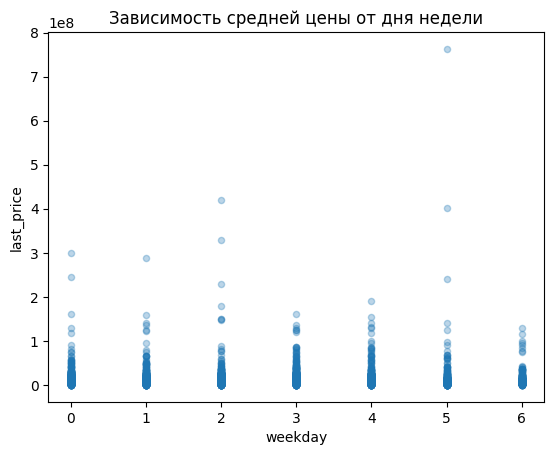

In [ ]:
data.plot(kind='scatter', x='weekday', y='last_price', title='Зависимость средней цены от дня недели', alpha=0.3)

Видно, что средняя цена, относительно стабильна.

<Axes: title={'center': 'Зависимость средней цены от месяца'}, xlabel='month', ylabel='last_price'>

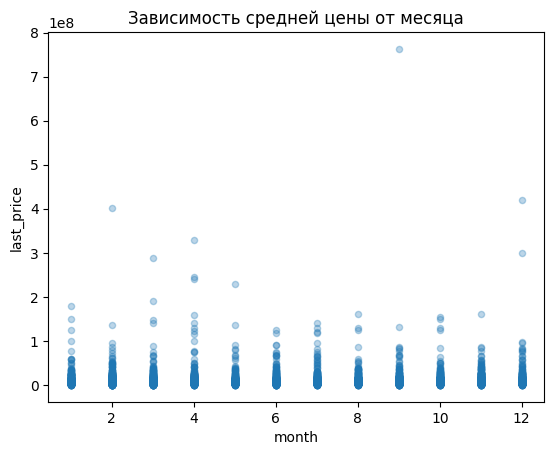

In [ ]:
data.plot(kind='scatter', x='month', y='last_price', title='Зависимость средней цены от месяца', alpha=0.3)

Наблюдаются сезонные колебания средней цены, с повышением в весенние и осенние месяцы и снижением в летние и зимние месяцы.

In [ ]:
top_10 = data['locality_name'].value_counts().head(10).index
top_10_data = data.query('locality_name in @top_10')
top_10_data.groupby('locality_name')['last_price'].mean().sort_values(ascending=False)

,last_price
locality_name,
Санкт-Петербург,8.062507e+06
Пушкин,6.469036e+06
посёлок Парголово,4.488075e+06
деревня Кудрово,4.234158e+06
посёлок Шушары,4.108082e+06
Колпино,3.964021e+06
Всеволожск,3.789068e+06
посёлок Мурино,3.672049e+06
Гатчина,3.488337e+06


Санкт-Петербург лидирует по средней цене квартиры
Пушкин занимает второе место с заметным отрывом, что может быть связано с престижностью района и наличием исторических объектов.
Выборг имеет самую низкую среднюю цену среди топ-10 населенных пунктов, что может быть связанно с удаленностью от Санкт-Петербурга и общим экономическим положением города.
Остальные населенные пункты находятся в диапазоне от 3.48 млн до 4.49 млн рублей, что указывает на относительно схожие ценовые характеристики.

In [ ]:
top_10_pivot = top_10_data.pivot_table(index='locality_name', values='price_per_square_meter')
print(top_10_pivot.sort_values(by='price_per_square_meter'))

                   price_per_square_meter
locality_name                            
Выборг                       58141.909153
Всеволожск                   68654.473986
Гатчина                      68746.146763
Колпино                      75424.579098
посёлок Шушары               78677.364217
посёлок Мурино               85752.189195
посёлок Парголово            90175.913458
деревня Кудрово              92473.547576
Пушкин                      103125.819291
Санкт-Петербург             114849.008794


Санкт-Петербург также лидирует по средней цене квадратного метра, что подтверждает его статус самого дорогого населенного пункта.
Пушкин занимает второе место, что соответствует его высокой средней цене квартиры.
Выборг имеет самую низкую среднюю цену квадратного метра, что также соответствует его низкой средней цене квартиры.
Интересно отметить, что посёлок Мурино и деревня Кудрово, хотя и находятся относительно близко друг к другу, имеют существенную разницу в средней цене квадратного метра 85 752 и 92 473. Это может быть связано с различиями в качестве жилья, инфраструктуре или других факторах.

In [ ]:
spb_data = data.query('locality_name == "Санкт-Петербург"')
spb_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floor_category,living_to_total_ratio,kitchen_to_total_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2.0,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,159.0,9,False,...,3.0,234.0,424.0,408176.100629,4,7,2015,другой,1.000000,0.057233
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000
7,5,7915000.0,71.6,2019-04-18,2,2.65,24,71.6,22,False,...,0.0,NaN,NaN,110544.692737,3,4,2019,другой,1.000000,0.263966


In [ ]:
spb_data['cityCenters_nearest_km'] = round(spb_data['cityCenters_nearest'] / 1000)
spb_data.head()

<ipython-input-60-b84377b273e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_data['cityCenters_nearest_km'] = round(spb_data['cityCenters_nearest'] / 1000)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floor_category,living_to_total_ratio,kitchen_to_total_ratio,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481,16.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,159.0,9,False,...,234.0,424.0,408176.100629,4,7,2015,другой,1.000000,0.057233,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000,8.0
7,5,7915000.0,71.6,2019-04-18,2,2.65,24,71.6,22,False,...,NaN,NaN,110544.692737,3,4,2019,другой,1.000000,0.263966,12.0


In [ ]:
spb_pivot = spb_data.pivot_table(index='cityCenters_nearest_km', values='last_price')
spb_pivot

,last_price
cityCenters_nearest_km,
0.0,3.144912e+07
1.0,2.120672e+07
2.0,1.778832e+07
3.0,1.112658e+07
4.0,1.330428e+07
5.0,1.449912e+07
6.0,1.533842e+07
7.0,1.477515e+07
8.0,9.957717e+06


<Axes: title={'center': 'Зависимость цены от удаленности от центра СПб'}, xlabel='cityCenters_nearest_km'>

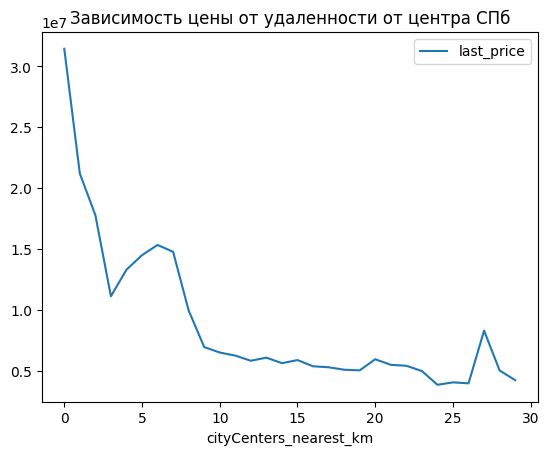

In [ ]:
spb_pivot.plot(title='Зависимость цены от удаленности от центра СПб')

На графике видно резкое падение цены вблизи центра (0-2 км). Это говорит о том, что квартиры, расположенные в самом центре, имеют значительно более высокую стоимость.
После 2-3 км цена стабилизируется и постепенно снижается с увеличением расстояния от центра.
Это указывает на то, что удаленность от центра оказывает меньшее влияние на цену, начиная с определенного расстояния.
Присутствует выброс в районе 27 км, что может указывать на наличие элитного жилья или других факторов, влияющих на цену.


На цену недвижимости влияет множество факторов, включая площадь, количество комнат, удаленность от центра, этаж и сезонность. Однако ни одна из этих зависимостей не является строго линейной, что подчеркивает сложность и многогранность рынка недвижимости.

In [ ]:
center_spb_data = spb_data.query('cityCenters_nearest_km <= 7')
center_spb_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floor_category,living_to_total_ratio,kitchen_to_total_ratio,cityCenters_nearest_km
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,159.0,9,False,...,234.0,424.0,408176.100629,4,7,2015,другой,1.000000,0.057233,7.0
24,8,6500000.0,97.2,2015-10-31,2,2.65,3,46.5,1,False,...,124.0,265.0,66872.427984,5,10,2015,первый,0.478395,0.201646,2.0
35,6,15500000.0,149.0,2017-06-26,5,2.65,5,104.0,4,False,...,779.0,644.0,104026.845638,0,6,2017,другой,0.697987,0.114094,4.0
51,7,45000000.0,161.0,2017-10-17,3,3.20,8,38.0,4,False,...,99.0,541.0,279503.105590,1,10,2017,другой,0.236025,0.310559,7.0
52,20,11795000.0,136.0,2017-09-22,6,3.00,2,94.0,2,False,...,NaN,NaN,86727.941176,4,9,2017,последний,0.691176,0.080882,7.0


In [ ]:
center_spb_data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,3525.000000,3.525000e+03,3525.000000,3525.000000
mean,93.168641,1.489553e+07,2.839149,2.940565
std,59.473561,2.432091e+07,1.442012,0.380220
min,12.000000,1.600000e+06,1.000000,2.400000
25%,57.000000,6.690000e+06,2.000000,2.650000
50%,78.700000,9.200000e+06,3.000000,2.800000
75%,110.000000,1.450000e+07,3.000000,3.150000
max,631.200000,7.630000e+08,19.000000,6.000000


Средняя площадь квартир в центре СПб составляет 93.17 кв.м.
Средняя цена квартиры в центре СПб — 14.89 млн рублей, но есть разброс, указывает на то, что в центре есть как относительно недорогие, так и очень дорогие квартиры.
В среднем в квартирах центра СПб 2.84 комнаты. Большинство квартир имеют от 1 до 3 комнат.
Средняя высота потолков — 2.94 метра, что выше, чем в среднем по городу.

<Axes: title={'center': 'Зависимость цены от площади (центр СПб)'}, xlabel='total_area', ylabel='last_price'>

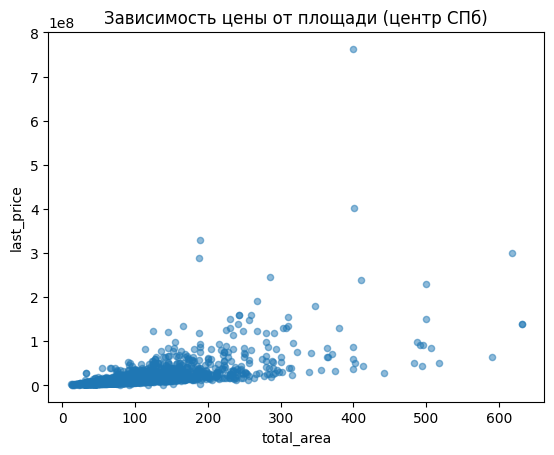

In [ ]:
center_spb_data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.5, title='Зависимость цены от площади (центр СПб)')

На графике четко видно, чем больше площадь квартиры, тем выше ее стоимость.

<Axes: title={'center': 'Зависимость цены от числа комнат (центр СПб)'}, xlabel='rooms', ylabel='last_price'>

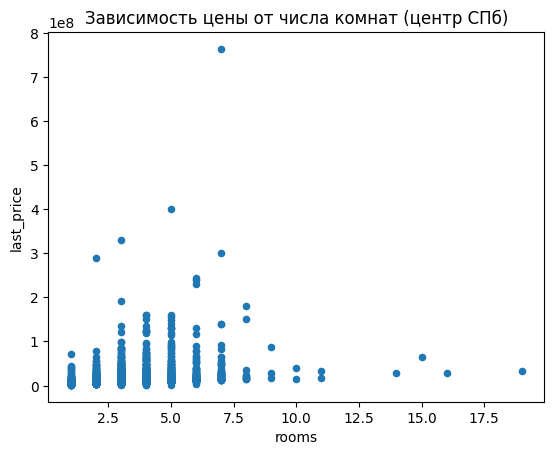

In [ ]:
center_spb_data.plot(x='rooms', y='last_price', kind='scatter', title='Зависимость цены от числа комнат (центр СПб)')

На графике видно, что в целом с увеличением числа комнат растет и цена квартиры. Однако эта зависимость не является строгой

<Axes: title={'center': 'Зависимость цены от этажа (центр СПб)'}, xlabel='floor_category', ylabel='last_price'>

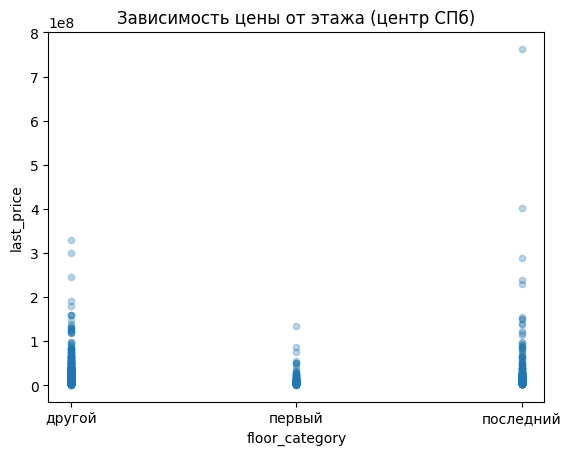

In [ ]:
center_spb_data.plot(kind='scatter', x='floor_category', y='last_price', title='Зависимость цены от этажа (центр СПб)', alpha=0.3)

Визуально видно, что квартиры на первом этаже имеют тенденцию к более низкой цене, чем квартиры на других этажах

<Axes: title={'center': 'Зависимость цены от дня недели (центр СПб)'}, xlabel='weekday', ylabel='last_price'>

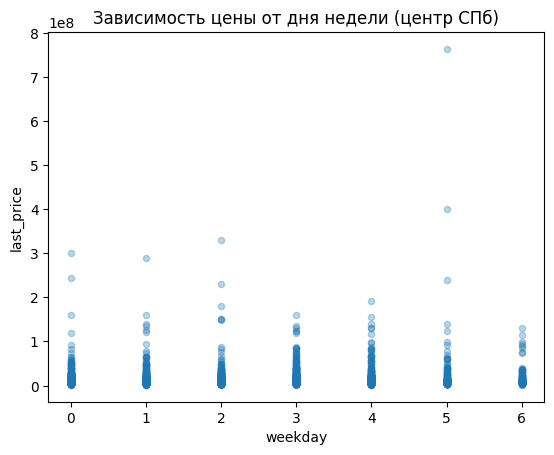

In [ ]:
center_spb_data.plot(kind='scatter', x='weekday', y='last_price', title='Зависимость цены от дня недели (центр СПб)', alpha=0.3)

Визуально кажется, что средняя цена квартиры относительно стабильна в течение недели. Однако, из-за большого разброса данных, трудно сделать однозначный вывод.

<Axes: title={'center': 'Зависимость цены от месяца (центр СПб)'}, xlabel='month', ylabel='last_price'>

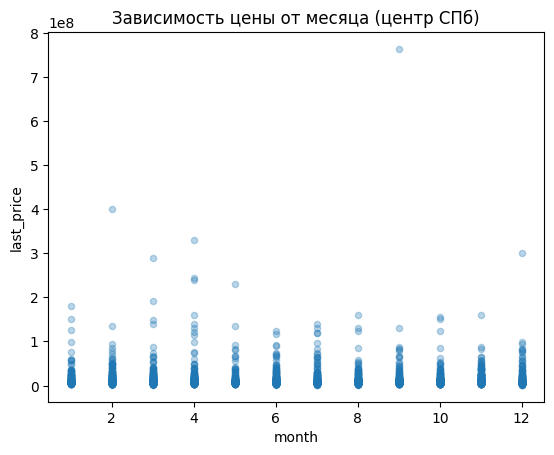

In [ ]:
center_spb_data.plot(kind='scatter', x='month', y='last_price', title='Зависимость цены от месяца (центр СПб)', alpha=0.3)

В центре СПб наблюдаются особенности, связанные с высоким спросом и меньшей зависимостью от сезонных колебаний

<Axes: title={'center': 'Зависимость цены от года (центр СПб)'}, xlabel='year', ylabel='last_price'>

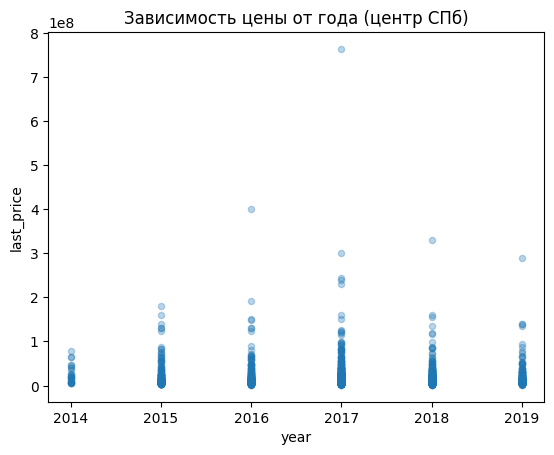

In [ ]:
center_spb_data.plot(kind='scatter', x='year', y='last_price', title='Зависимость цены от года (центр СПб)', alpha=0.3)

График оказывает, что цены на квартиры в центре Санкт-Петербурга имели тенденцию к росту в период с 2014 по 2019 год

<Axes: title={'center': 'Зависимость цены от удаленности от центра СПб (центр)'}, xlabel='cityCenters_nearest_km'>

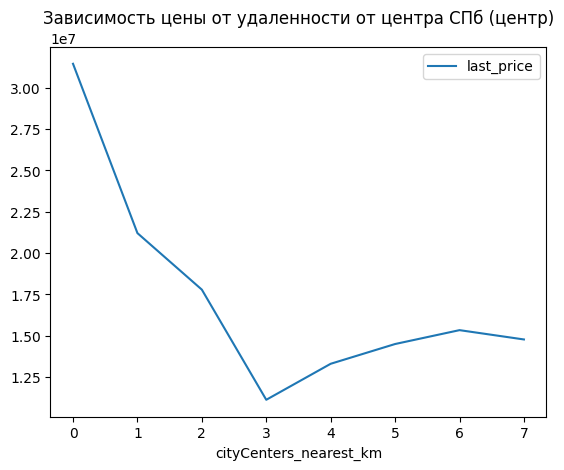

In [ ]:
center_spb_pivot = center_spb_data.pivot_table(index='cityCenters_nearest_km', values='last_price')
center_spb_pivot.plot(title='Зависимость цены от удаленности от центра СПб (центр)')

На графике наблюдается общий тренд к снижению цены с увеличением расстояния от центра, но этот тренд менее выражен, чем на общем графике.

Анализ сегмента квартир в центре Санкт-Петербурга подтвердил, что общие закономерности рынка недвижимости, выявленные на основе анализа всей базы данных, применимы и к центру города.

## Общий вывод

Ключевые факторы, влияющие на стоимость квартир:

1)Площадь квартиры наиболее значимый фактор.
Чем больше площадь, тем выше цена.
Зависимость не является строго линейной, особенно для квартир большой площади.
Так как Отражают размер и функциональность квартиры.
2)Число комнат существенно влияет на цену.
С увеличением числа комнат цена растет.
Так как большие квартиры с большим количеством комнат обеспечивают больше комфорта и пространства.
3)Удаленность от центра: квартиры в центре города значительно дороже. С увеличением расстояния от центра цена снижается.
Так как центр города обладает развитой инфраструктурой, транспортной доступностью и престижем.
Близость к центру обеспечивает удобство и доступ к различным услугам.
4)Этаж: квартиры на первом этаже обычно дешевле.
Квартиры на последних и других этажах имеют более высокую стоимость, но разброс цен больше.
В центре города разница между этажами менее выражена.
Так как первый этаж может быть менее привлекательным из-за шума, пыли и меньшей приватности.
5)Влияние дня недели не выражено явно.
Наблюдается общий тренд к увеличению цен в сезоны: осень, весна и с течением времени с 2014 по 2019 год.
Весной и осенью наблюдается повышение активности на рынке недвижимости. Благоприятные погодные условия и начало учебного года приводят к увеличению спроса.
Общий тренд к увеличению цен отражает инфляцию и рост спроса на недвижимость.
В центре города стабильный спрос, на него не влияют так сильно сезонные колебания.
6)Населенный пункт: Санкт-Петербург является самым дорогим населенным пунктом.
Пушкин также отличается высокой стоимостью жилья.
Выборг - самый дешевый населенный пункт среди топ-10.
Предположения, почему эти факторы влияют на цену:

Площадь квартиры оказывает наибольшее влияние на цену.

Рынок недвижимости в Санкт-Петербурге подчиняется общим закономерностям, но имеет свои особенности, особенно в центре города. При анализе стоимости квартир необходимо учитывать комплексное влияние различных факторов.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года».
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод